### 2021_11_01_4

### 사람 얼굴 이미지 데이터 셋을 이용한 PCA 실습
### LFW(Labeled Faces in the Wild)데이터 셋에서 얼굴 이미지에서 특성 추출
* 데이터 셋 :
    * 매사추세츠 애머스트 주립대학교의 비전랩에서 생성 http://vis-www.cs.umass.edu/lfw를 참고
    * 인터넷에서 내려 받은 유명 인사들의 얼굴 이미지. 2000년 초반 정치인, 가수, 배우, 운동선수들의 얼굴을 포함.
    * 총 62명의 얼굴. 3023개의 이미지
    * 이미지의 크기 87 x 65

In [22]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import mglearn

In [2]:
people = fetch_lfw_people(min_faces_per_person = 20, 
                         resize = 0.7)

print(people.keys())
print("이미지 행렬 : ", people.images.shape)
print("사람 : ", people.target_names)

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])
이미지 행렬 :  (3023, 87, 65)
사람 :  ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' '

### 얼굴 이미지 10개 표시하기

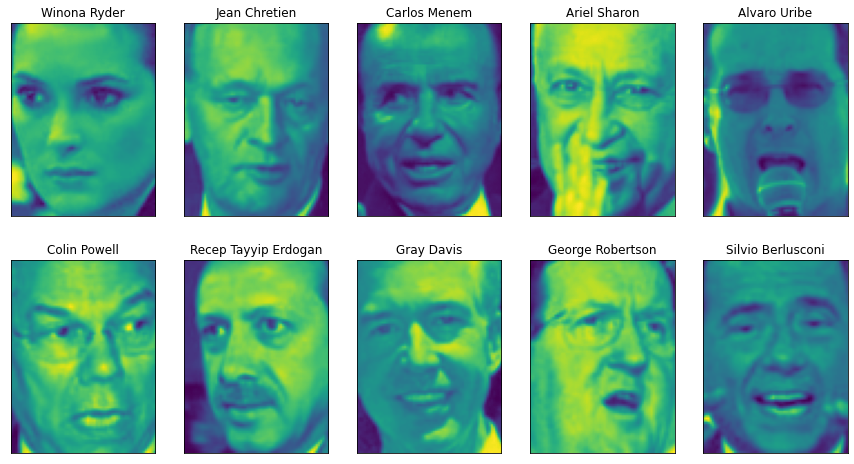

In [5]:
fig, axes = plt.subplots(2, 5, figsize = (15, 8), 
                        subplot_kw = {"xticks" : (), "yticks" : ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()) :
    ax.imshow(image) # 이미지 표시
    ax.set_title(people.target_names[target]) # 이미지별 이름

### 이미지 크기

In [6]:
print("이미지 크기:", people.images.shape)
print("클래스 개수:", len(people.target_names))

이미지 크기: (3023, 87, 65)
클래스 개수: 62


### 각 사람의 이미지는 몇장씩 있는가?(중복 확인)

In [7]:
# 타깃 값의 각각의 데이터 개수
counts = np.bincount(people.target)
print(counts)
print("최소 : {}, 최대 : {}".format(np.min(counts), np.max(counts)))

[ 39  35  21  36  20  77  42  24  29  21 236  31 121  22 530 109  44  26
  30  22  39  71  20  28  52  55  21  42  21  24  20  53  31  23  28  60
  32  41  22  41  48  29  33  20  22  37  20  22  30  27  32  26  23  52
  33  23  25  33 144  32  49  24]
최소 : 20, 최대 : 530


### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력

In [8]:
for i, (count, name) in enumerate(zip(counts, people.target_names)) :
    print("{0:25} {1:3}".format(name, count), end = "    ")
    if (i + 1) % 3 == 0 :
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [9]:
### 타깃(사람)의 이름과 각 사람별 데이터 개수 출력.(2사람, 1줄에)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:5}, {1:25}".format(count, name), end="   ")
    if (i + 1) % 2 == 0:
        print()

   39, Alejandro Toledo               35, Alvaro Uribe                
   21, Amelie Mauresmo                36, Andre Agassi                
   20, Angelina Jolie                 77, Ariel Sharon                
   42, Arnold Schwarzenegger          24, Atal Bihari Vajpayee        
   29, Bill Clinton                   21, Carlos Menem                
  236, Colin Powell                   31, David Beckham               
  121, Donald Rumsfeld                22, George Robertson            
  530, George W Bush                 109, Gerhard Schroeder           
   44, Gloria Macapagal Arroyo        26, Gray Davis                  
   30, Guillermo Coria                22, Hamid Karzai                
   39, Hans Blix                      71, Hugo Chavez                 
   20, Igor Ivanov                    28, Jack Straw                  
   52, Jacques Chirac                 55, Jean Chretien               
   21, Jennifer Aniston               42, Jennifer Capriati           
   21,

* George W Bush 등의 이미지는 많기 때문에 이 데이터를 그대로 이용하며 편중이 생길 수 있어,
* 사람마다 이미지의 개수가 차이가 있어,데이터가 편중되는 것을 막기 위해 각 사람당 50개 이미지만 추출

### 50개씩 데이터를 추출하기 위해..
* 전체 이미지수에 False로 매핑
* 각 사람의 순서대로 50개씩, True로 값을 지정.

In [10]:
people.target.shape

(3023,)

In [11]:
nums = people.target.shape  # 이미지의 수
mask = np.zeros(nums, dtype=np.bool)
mask

/var/folders/t9/yt46lj5s0lv1slvgpm05mrs00000gn/T/ipykernel_47735/3103083987.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(nums, dtype=np.bool)


array([False, False, False, ..., False, False, False])

In [12]:
# 중복값을 제외한 값을 표시
np.unique(people.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61])

In [13]:
# 각 사람별 50명씩 선택
nums = np.unique(people.target)

for target in nums :
    mask[np.where(people.target == target)[0][:50]] = 1

# 전체 데이터의 1로 되어 있는 것을 가져오기
X_people = people.data[mask]
y_people = people.target[mask]

# 정규화
# 0 ~ 255 사이의 흑백 이미지의 픽셀 값을 0 ~ 1 스케일로 조정.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.
print(X_people.shape)

(2063, 5655)


### 데이터 지도학습 모델에 적용
* 분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾으려는 1-최근접 이웃 분류기

In [14]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 0)

# 이웃 개수를 한 개로 하여 KNeightborsClassifier 모델을 만든다.
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1-최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

1-최근접 이웃의 테스트 세트 점수 : 0.23


* 클래스 62개를 분류하는 문제에서 나쁜 결과는 아니지만, 그렇다고 좋은 결과도 아님

### PCA를 이용해서 87 x 65(=5655)의 특징을 갖는 성분을 100개의 주성분으로 추출.

In [15]:
from sklearn.decomposition import PCA

In [16]:
# 화이트닝 옵션은 PCA변환을 할 때 이 표준편차를 나누어 적용. 
# PCA 변환은 데이터의 평균을 0으로 만들어주므로 
# 화이트닝을 적용하는 것은 PCA변환한 뒤에 StandardScaler를 적용하는 것과 같다.
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)
print("X_test_pca.shape:", X_test_pca.shape)

X_train_pca.shape: (1547, 100)
X_test_pca.shape: (516, 100)


* 새로운 데이터는 처음 100개의 주성분에 해당되는 특성을 가짐.
* 이 데이터를 사용하여 1-최근접 이웃 분류기로 이미지를 분류

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("테스트 정확도 : {:.2f}".format(knn.score(X_test_pca, y_test)))

테스트 정확도 : 0.31


* 모델의 정확도가 23%에서 31%로 향상

### 주성분 이미지 확인
* 주성분이 나타내는 것은 입력 데이터 공간에서의 어떤 방향이다.
* 입력 차원은 87 x 65 = 5655

### 한글 보이도록 설정

In [18]:
# 한글
import matplotlib
from matplotlib import font_manager, rc
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

### 각각의 주성분 그래프로 확인해보기

pca.components_.shape  (100, 5655)


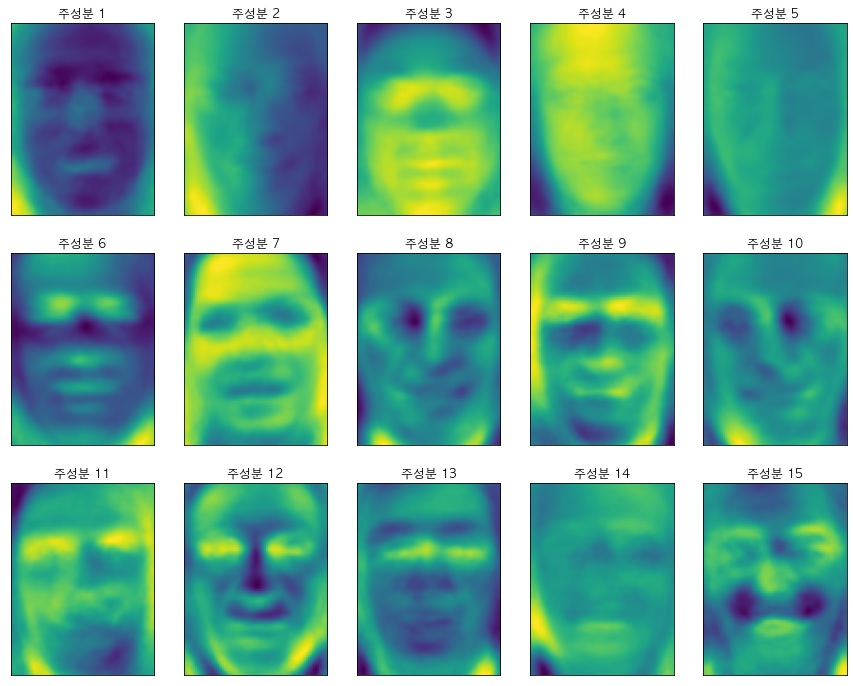

In [20]:
image_shape = people.images[0].shape # 3023장의 이미지
print("pca.components_.shape ", pca.components_.shape)

fig, axes = plt.subplots(3, 5, figsize=(15,12),
                        subplot_kw={'xticks':(), 'yticks':() })

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap="viridis")
    ax.set_title("주성분 {}".format((i+1)))

* 이 주성분을 전부 이해할 수 없다.
    * 첫번째 주성분은 얼굴과 배경의 명암 차이를 기록한 것.
    * 두번째 주성분은 오른쪽과 왼쪽 조명의 차이를 담고 있는 것.
* PCA 모델은 픽셀을 기반으로 하므로 얼굴의 배치와 조명이 두 이미지에 얼마나 비슷한지 판단하는 데 큰 영향을 준다.

### 주성분의 일부를 사용하여 이미지 재구성
* 몇 개의 주성분으로 데이터를 줄이고 원래 공간으로 되돌릴 수 있음.

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 1.5s, 0.0min


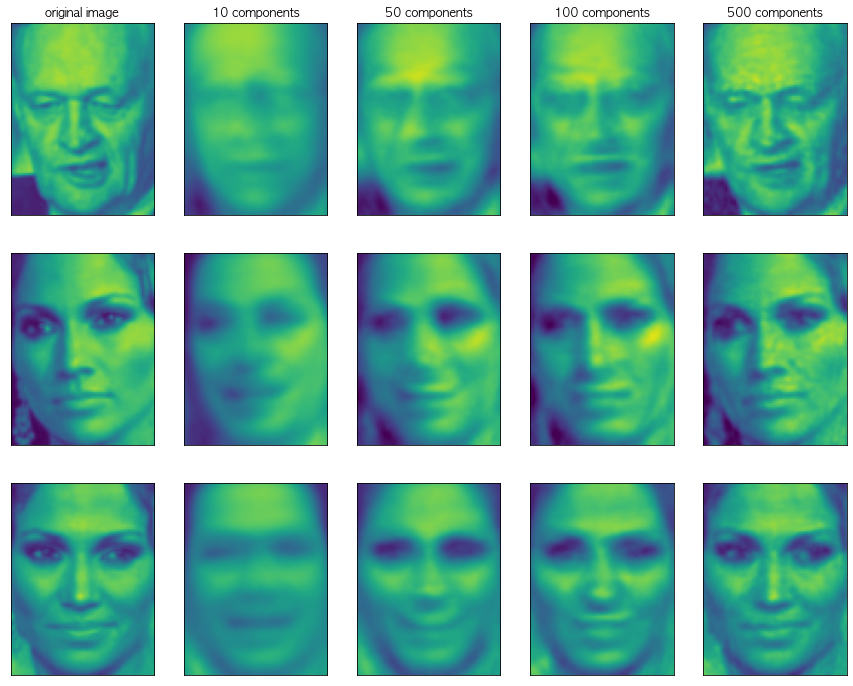

In [23]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

* 주성분을 10개만 사용했을 땐, 얼굴의 각도, 조명 같은 이미지의 기본 요소만 나타남.
* 주성분이 더 많이 사용되면 될 수록 이미지가 더욱 상세해짐.

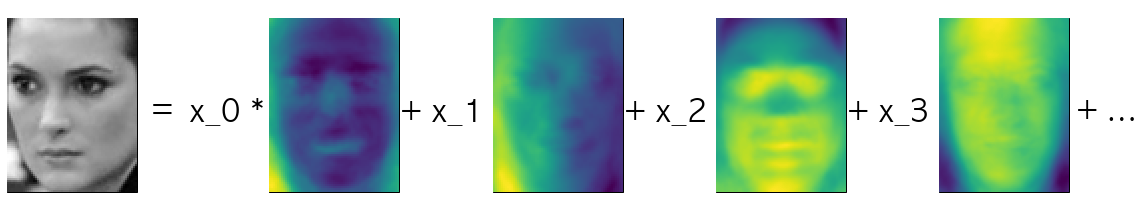

In [24]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.285 + .2 * i, 0.4),
                        pad=0.0, xycoords='data')
    ax.add_artist(ab)
    if i == 0:
        plt.text(.155, .3, 'x_{} *'.format(i), fontdict={'fontsize': 30})
    else:
        plt.text(.145 + .2 * i, .3, '+ x_{} *'.format(i),
                 fontdict={'fontsize': 30})

plt.text(.95, .3, '+ ...', fontdict={'fontsize': 30})

plt.rc('text')
plt.text(.12, .3, '=', fontdict={'fontsize': 30})
plt.axis("off")
plt.show()
plt.close()
plt.rc('text')

### 그외.

* NMF 알고리즘
    * 유용한 특성을 뽑기 위한 또 다른 비지도 학습 알고리즘
    * PCA와 비슷하고 차원 축소에도 사용이 가능합니다.
* PCA에서는 데이터의 분산이 크고, 수직인 성분을 찾았다면,
    * NMF는 음수가 아닌 성분과 계수 값을 찾는다.
* NMF에서는 차원 감소 기법이다.
* NMF(Non-negative Matrix Factorization) - 비음수 행렬 분해

    * NMF는 하나의 객체 정보를 행렬 V가 보통 두 개의 음수를 포함하지 않는 행렬 W와 H로 분해하여 의미 있는 특징을 추출하는 기법.
    * NMF의 목적은 공통 특징만을 가지고 정보를 줄이는 것이다.

    * NMF는 행렬 인수 분해 알고리즘 중의 하나이다.

        * 컴퓨터 시각 처리나 문서 분류, 음파 분석 등에 널리 사용된다.
        * 새로운 특징 셋이 어떻게 원본 데이터와 관계를 가지는지 확인이 가능하다.
        * 즉 주성분과 계수가 모두 0보다 크거나 같아야 함.
        * 음수가 아닌 주성분과 계수의 가중치 합은 음수가 되지 않으므로 당연하게 이 방식은 음수가 아닌 특성을 가진 데이터에만 적용 가능
    * 이 기능은 여러 사람의 목소리가 담긴 오디오 트랙이나 여러 악기로 이뤄진 음악처럼 독립된 소스를 추가하여 만들어진 데이터에 특히 유용합니다.

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


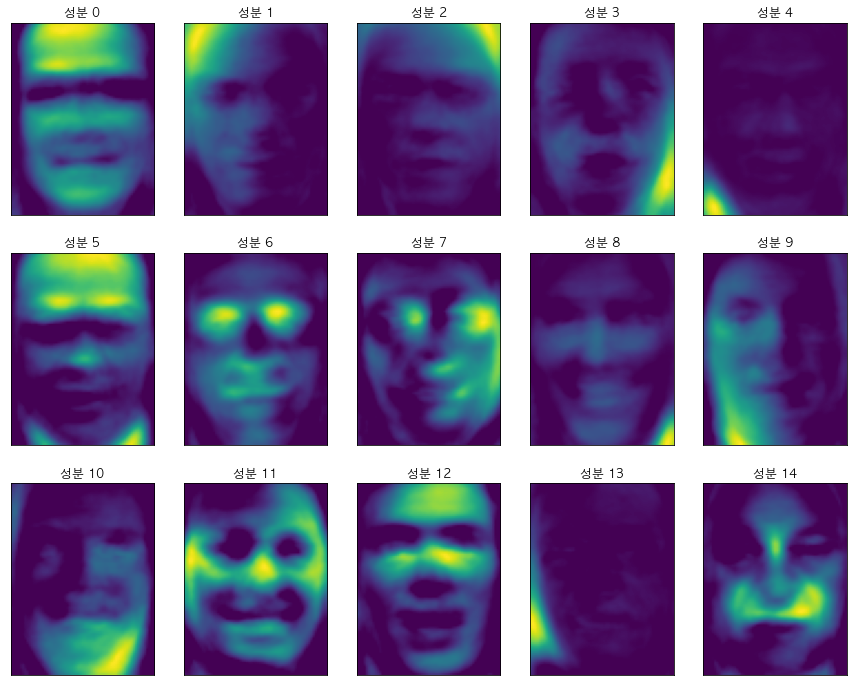

In [25]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("성분 {}".format(i))

* NMF보다 PCA사용시에 품질이 좋다.
* NMF는 데이터 인코딩과 재구성보다 데이터의 패턴을 찾는데 활용

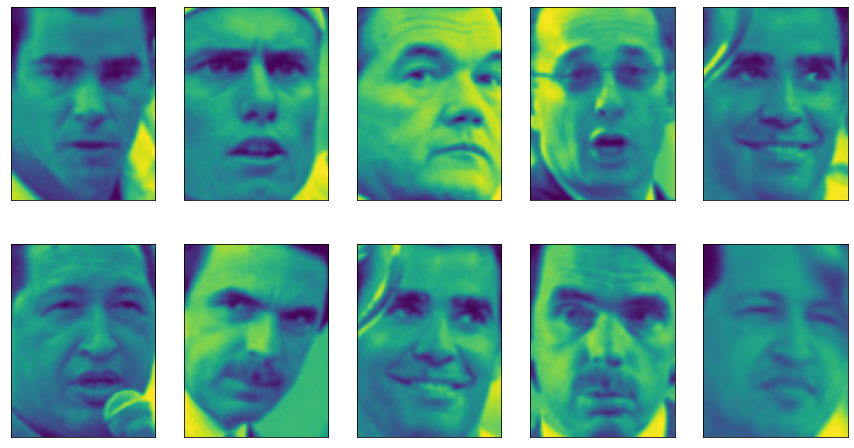

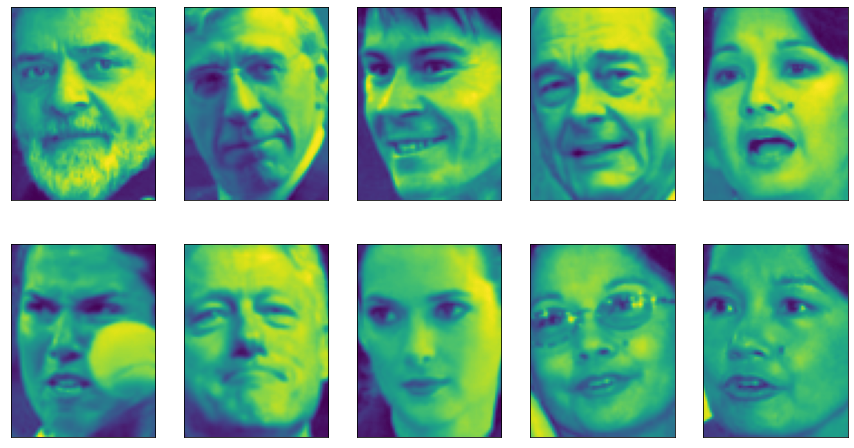

In [26]:
compn = 3
# 4번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
# 8번째 성분으로 정렬하여 처음 10개 이미지를 출력합니다
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

* 성분 3은 오른쪽으로 얼굴이 돌아감.
* 성분 7은 왼쪽으로 얼굴이 돌아감.

### 비지도학습
* 비지도변환 : PCA, SVD, NMF, tSNE
* 군집 : K-means, K-medoid, DBSCAN